In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install tensorflow==1.14

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# pip install -e git+https://github.com/marcoancona/DeepExplain.git #egg=deepexplain

In [3]:
import sys
!{sys.executable} -m pip install -e git+https://github.com/marcoancona/DeepExplain.git#egg=deepexplain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining deepexplain from git+https://github.com/marcoancona/DeepExplain.git#egg=deepexplain
  Updating ./src/deepexplain clone
  Running command git fetch -q --tags
  Running command git reset --hard -q 87fb43a13ac2a3b285a030b87df899cc40100c94
  Attempting uninstall: deepexplain
    Found existing installation: deepexplain 0.3
    Can't uninstall 'deepexplain'. No files were found to uninstall.
  Running setup.py develop for deepexplain


In [4]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [6]:
!pip install mne --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import numpy as np

# mne imports
import mne
from mne import io
from mne.datasets import sample

# EEGNet-specific imports
from EEGModels import EEGNet
from tensorflow.keras import utils as np_utils
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras import backend as K
from tensorflow.keras.models import Model

from deepexplain.tensorflow import DeepExplain

In [8]:
from EEGModels import EEGNet, ShallowConvNet, DeepConvNet
from tensorflow.keras.models import Model
from deepexplain.tensorflow import DeepExplain
from tensorflow.keras import backend as K


In [31]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
!pip install np_utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 568 kB/s 
  Created wheel for np-utils: filename=np_utils-0.6.0-py3-none-any.whl size=56459 sha256=17aa952001dce6f4a7e401c1ac5e49fb00d6f147461314951a65acd60c3386fc
  Stored in directory: /root/.cache/pip/wheels/d2/83/71/a781667865955ae7dc18e5a4038401deb56d96eb85d3a5f1c0
Successfully built np-utils


In [47]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from tensorflow.keras.models import Sequential,load_model,model_from_json
from tensorflow.keras.layers import Dense, Dropout, LSTM,BatchNormalization,TimeDistributed,Flatten,Bidirectional

In [42]:
from tensorflow import keras 
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 4.3 kB/s 
     |████████████████████████████████| 5.8 MB 43.0 MB/s 
     |████████████████████████████████| 1.6 MB 46.8 MB/s 
     |████████████████████████████████| 438 kB 51.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully uninstalled tensorflow-estimator-1.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled g

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 5.9 kB/s 


In [114]:
filename = '/content/drive/MyDrive/ell319_termpaper/BTP/dataICA.txt'
data=pd.read_table(filename, delimiter = '\t')
data

,Time,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,...,CP1,CP2,FC5,FC6,CP5,CP6,FT9,FT10,TP9,TP10
0,0.0,2.96,2.49,2.19,2.31,0.29,-1.91,-1.11,-3.25,-0.91,...,-0.99,-2.73,0.74,-0.48,-0.57,-2.68,2.65,1.77,1.48,2.98
1,2.0,2.79,3.47,2.06,3.24,0.22,-2.17,-0.90,-3.43,-0.58,...,-0.97,-2.15,0.08,0.01,-1.62,-2.95,2.76,1.13,1.36,1.97
2,4.0,2.74,4.37,2.05,4.10,0.29,-2.29,-0.67,-3.60,-0.45,...,-0.83,-1.56,-0.45,0.68,-2.55,-3.26,2.85,0.68,0.88,0.44
3,6.0,2.81,5.08,2.18,4.77,0.54,-2.21,-0.44,-3.69,-0.56,...,-0.56,-0.97,-0.72,1.38,-3.26,-3.55,2.85,0.45,-0.02,-1.43
4,8.0,2.94,5.53,2.46,5.17,0.93,-1.90,-0.21,-3.64,-0.92,...,-0.14,-0.37,-0.69,1.96,-3.71,-3.75,2.73,0.41,-1.28,-3.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160565,2321130.0,-1.27,3.74,-0.26,2.26,1.28,3.91,1.65,1.84,0.77,...,3.62,4.22,-2.75,4.11,0.96,2.41,-3.37,-0.01,-4.98,-27.67
1160566,2321132.0,-0.73,2.78,-0.19,1.19,1.46,3.16,1.74,2.19,1.40,...,3.46,3.08,-2.45,2.62,1.60,2.51,-2.66,-0.19,-4.93,-26.23
1160567,2321134.0,-0.32,1.28,-0.11,0.29,1.84,2.35,1.87,2.41,1.92,...,3.31,2.02,-1.81,0.80,2.41,2.40,-1.97,-1.00,-4.51,-23.07
1160568,2321136.0,-0.12,-0.43,-0.02,-0.37,2.34,1.59,2.01,2.49,2.21,...,3.16,1.17,-0.91,-1.06,3.23,2.09,-1.39,-2.23,-3.77,-18.79


In [115]:
filename_events = '/content/drive/MyDrive/ell319_termpaper/BTP/events.txt'
data_events=pd.read_table(filename_events, delimiter = '\t')
data_events

,number,latency,duration,channel,bvtime,bvmknum,visible,type,code,urevent
0,1.0,1.0,NaN,0.0,1.094600e+09,1.0,NaN,boundary,New Segment,1.0
1,2.0,16401.0,1.0,0.0,NaN,2.0,NaN,A,STIM,2.0
2,3.0,17191.0,1.0,0.0,NaN,3.0,NaN,PP,STIM,3.0
3,4.0,17491.0,1.0,0.0,NaN,4.0,NaN,B,STIM,4.0
4,5.0,18381.0,1.0,0.0,NaN,5.0,NaN,PP,STIM,5.0
...,...,...,...,...,...,...,...,...,...,...
2614,2615.0,1158691.0,1.0,0.0,NaN,257.0,NaN,PP,STIM,2615.0
2615,2616.0,1158851.0,1.0,0.0,NaN,258.0,NaN,Y,STIM,2616.0
2616,2617.0,1159531.0,1.0,0.0,NaN,259.0,NaN,PP,STIM,2617.0
2617,2618.0,1159671.0,1.0,0.0,NaN,260.0,NaN,Z,STIM,2618.0


In [116]:
al = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
df_req = pd.DataFrame()
seq_gen = [];
big_array = [] #  empty regular list
for i in range(1300):
    arr = i*np.ones((250,32)) # for instance
    big_array.append(arr)
big_np_array = np.array(big_array)  

c = 0
for j in range(26):
    data_a = data;
    for ind in data_events.index:
        if data_events['type'][ind]==al[j]:
            low = data_events['latency'][ind]-250;
            high = data_events['latency'][ind]+250;
            d_x = data_a.loc[(data_a['Time'] >= low) & (data_a['Time'] <= high)]
            d_x.drop(['Time'], axis=1, inplace=True);
            d_x['Label'] = (j+1);
            d_x.to_numpy()
            big_np_array[c] = d_x;
            c = c+1
        else:
            continue;
print(big_np_array.shape)
seq_array = big_np_array
seq_array

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(1300, 250, 32)


array([[[ 2.910e+00,  5.480e+00,  7.000e-02, ..., -4.840e+00,
          2.970e+00,  1.000e+00],
        [ 2.810e+00,  5.890e+00, -2.900e-01, ..., -5.110e+00,
          3.360e+00,  1.000e+00],
        [ 2.190e+00,  6.040e+00, -7.700e-01, ..., -4.580e+00,
          3.490e+00,  1.000e+00],
        ...,
        [-4.050e+00, -2.990e+00,  4.500e-01, ..., -4.520e+00,
          9.000e-01,  1.000e+00],
        [-3.360e+00, -2.200e+00,  4.200e-01, ..., -4.000e+00,
          2.210e+00,  1.000e+00],
        [-2.350e+00, -2.060e+00,  2.500e-01, ..., -3.150e+00,
          2.840e+00,  1.000e+00]],

       [[-3.210e+00, -5.120e+00,  1.300e-01, ...,  8.310e+00,
         -1.650e+00,  1.000e+00],
        [-3.770e+00, -5.490e+00,  1.800e-01, ...,  1.014e+01,
         -6.000e-01,  1.000e+00],
        [-4.380e+00, -5.720e+00,  3.600e-01, ...,  1.132e+01,
          7.400e-01,  1.000e+00],
        ...,
        [ 1.880e+00,  2.710e+00,  4.510e+00, ..., -2.400e+00,
         -1.235e+01,  1.000e+00],
        [ 1.

In [117]:
from sklearn.utils import shuffle
seq_array = shuffle(seq_array)
print(seq_array.shape)

(1300, 250, 32)


In [118]:

kernels, chans, samples = 1, 31, 250

train_final=seq_array[0:900,:,0:31]
train_final_validate=seq_array[900:1100,:,0:31]

test_final=seq_array[1100:1300,:,0:31]
from sklearn import preprocessing

train_label=seq_array[0:900,0,31]
train_label_validate=seq_array[900:1100,0,31]
train_label_comp=seq_array[0:1100,0,31]

test_label=seq_array[1100:1300,0,31]

train_label=train_label.reshape((train_label.shape[0],1))
train_label=train_label.astype('int')

train_label_validate=train_label_validate.reshape((train_label_validate.shape[0],1))
train_label_validate=train_label_validate.astype('int')

train_label_comp=train_label_comp.reshape((train_label_comp.shape[0],1))
train_label_comp=train_label_comp.astype('int')

test_label=test_label.astype('int')
print(train_final.shape)
print(train_label.shape)
print(train_final_validate.shape)
print(train_label_validate.shape)
print(test_final.shape)
print(test_label.shape)

(900, 250, 31)
(900, 1)
(200, 250, 31)
(200, 1)
(200, 250, 31)
(200,)


In [119]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(train_label_comp)
train_label = encoder.transform(train_label)
train_label_validate = encoder.transform(train_label_validate)
test_label = encoder.transform(test_label)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [120]:
train_final = train_final.reshape(train_final.shape[0], chans, samples, kernels)
train_final_validate = train_final_validate.reshape(train_final_validate.shape[0], chans, samples, kernels)
test_final = test_final.reshape(test_final.shape[0], chans, samples, kernels)

In [121]:

# from keras.utils import np_utils

train_label = np_utils.to_categorical(train_label)
train_final = np.asarray(train_final).astype(np.float32)

train_label_validate = np_utils.to_categorical(train_label_validate)
train_final_validate = np.asarray(train_final_validate).astype(np.float32)

test_final = np.asarray(test_final).astype(np.float32)

EEGNet

In [122]:
model = EEGNet(nb_classes = 26, Chans = chans, Samples = samples, 
               dropoutRate = 0.5, kernLength = 32, F1 = 8, D = 2, F2 = 16, 
               dropoutType = 'Dropout')
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics = ['accuracy'])

# count number of parameters in the model
numParams    = model.count_params()    
print(numParams)

4362


ShallowConvNet

In [93]:
model = ShallowConvNet(nb_classes = 26, Chans = chans, Samples = samples, 
               dropoutRate = 0.5,)
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics = ['accuracy'])

# count number of parameters in the model
numParams    = model.count_params()    
print(numParams)

81546


DeepConvNet

In [110]:
model = DeepConvNet(nb_classes = 26, Chans = chans, Samples = samples, 
               dropoutRate = 0.5, )
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics = ['accuracy'])

# count number of parameters in the model
numParams    = model.count_params()    
print(numParams)

209876


In [123]:
checkpointer = ModelCheckpoint(filepath='/tmp/checkpoint.h5', verbose=1,
                               save_best_only=True)
class_weights = {0:1, 1:1, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1, 11:1, 12:1, 13:1, 14:1, 15:1, 16:1, 17:1, 18:1, 19:1, 20:1, 21:1, 22:1, 23:1, 24:1, 25:1, 26:1}

In [ ]:
fittedModel = model.fit(train_final, train_label, batch_size = 16, epochs = 300, verbose = 2, validation_data=(train_final_validate, train_label_validate),callbacks=[checkpointer], class_weight = class_weights)

Train on 900 samples, validate on 200 samples
Epoch 1/300

Epoch 00001: val_loss improved from inf to 3.25872, saving model to /tmp/checkpoint.h5
900/900 - 8s - loss: 3.2749 - acc: 0.0311 - val_loss: 3.2587 - val_acc: 0.0050
Epoch 2/300

Epoch 00002: val_loss did not improve from 3.25872
900/900 - 6s - loss: 3.2609 - acc: 0.0556 - val_loss: 3.2595 - val_acc: 0.0200
Epoch 3/300

Epoch 00003: val_loss did not improve from 3.25872
900/900 - 7s - loss: 3.2526 - acc: 0.0533 - val_loss: 3.2605 - val_acc: 0.0250
Epoch 4/300

Epoch 00004: val_loss did not improve from 3.25872
900/900 - 7s - loss: 3.2528 - acc: 0.0333 - val_loss: 3.2613 - val_acc: 0.0250
Epoch 5/300

Epoch 00005: val_loss did not improve from 3.25872
900/900 - 6s - loss: 3.2530 - acc: 0.0511 - val_loss: 3.2626 - val_acc: 0.0300
Epoch 6/300

Epoch 00006: val_loss did not improve from 3.25872
900/900 - 6s - loss: 3.2434 - acc: 0.0600 - val_loss: 3.2623 - val_acc: 0.0350
Epoch 7/300

Epoch 00007: val_loss did not improve from 3.25

In [125]:
probs       = model.predict(test_final)
preds       = probs.argmax(axis = -1)  
acc         = np.mean(preds == test_label.argmax(axis=-1))
print("Classification accuracy: %f " % (acc))

Classification accuracy: 0.030000 


In [126]:
# names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
# plot_confusion_matrix(preds, test_label.argmax(axis = -1), names, title = 'EEGNet-8,2')
cm_test = confusion_matrix(test_label, preds)
print(cm_test)

[[0 1 0 0 0 0 2 0 0 0 1 1 0 0 0 0 0 1 0 2 1 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1]
 [0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 2 0 0 1 0 0]
 [0 0 1 1 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 2 1 0 0 0 0 0]
 [0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 1 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 2 0 1 1 1 0 0 0 0]
 [0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 2 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 3 2 2 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1]
 [0 1 0 0 0 2 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 2 0 0 0 1]
 [0 0 0 0 0 0 1 1 0 1 2 1 0 2 1 0 0 1 0 1 0 0 0 0 0 2]
 [0 0 0 1 

In [127]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig=plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fig.savefig('confusion_matrix_gender_alpha.png',bbox_inches='tight')

Confusion matrix, without normalization
[[0 1 0 0 0 0 2 0 0 0 1 1 0 0 0 0 0 1 0 2 1 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1]
 [0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 2 0 0 1 0 0]
 [0 0 1 1 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 2 1 0 0 0 0 0]
 [0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 1 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 2 0 1 1 1 0 0 0 0]
 [0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 2 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 3 2 2 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1]
 [0 1 0 0 0 2 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 2 0 0 0 1]
 [0 0 0 0 0 0 1 1 0 1 2 1

<Figure size 720x720 with 0 Axes>

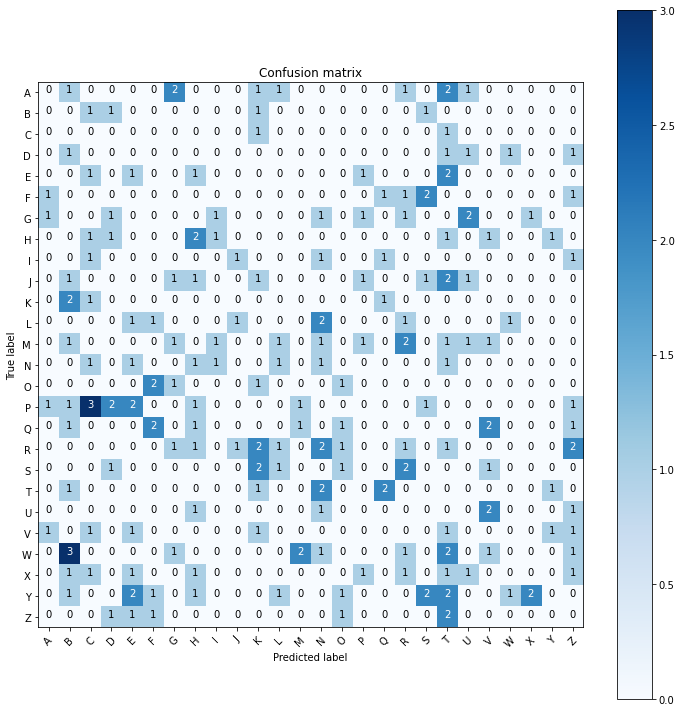

In [128]:
class_names=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

import matplotlib.pyplot as plt
plt.figure()
plt.rcParams["figure.figsize"] = (10,10)
plot_confusion_matrix(cm_test, classes=class_names,
                      title='Confusion matrix')
plt.show()